In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

|Hyperparameter/Layer type|	What does it do?|	Typical values|
|-------------------------|-----------------|---------------|
|Input image(s)|	Target images you'd like to discover patterns in|	Whatever you can take a photo (or video) of|
|Input layer|	Takes in target images and preprocesses them for further layers|	input_shape = [batch_size, image_height, image_width, color_channels]|
|Convolution layer|	Extracts/learns the most important features from target images|	Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)|
|Hidden activation|	Adds non-linearity to learned features (non-straight lines)	|Usually ReLU (tf.keras.activations.relu)|
|Pooling layer|	Reduces the dimensionality of learned image features|	Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)|
|Fully connected layer|	Further refines learned features from convolution layers|	tf.keras.layers.Dense|
|Output layer|	Takes learned features and outputs them in shape of target labels|	output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)|
|Output activation	|Adds non-linearities to output layer	|tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax|

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-24 17:13:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   165MB/s    in 0.4s    

2023-09-24 17:13:46 (165 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

local_zip = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()


zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


### For ImageGenerator


### Data augmentation
```
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)
```

### Take from directory



```
.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)
```



In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (150, 150),
                                                    class_mode = "binary",
                                                    batch_size = 20)

val_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                        target_size = (150,150),
                                                        class_mode = "binary",
                                                        batch_size = 20)






Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ]
)

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_generator,
                        epochs = 20,
                        validation_data=val_generator,
                        verbose = 1)

Epoch 1/20
100/100 [==============================] - 54s 538ms/step - loss: 0.6873 - accuracy: 0.5560 - val_loss: 0.6647 - val_accuracy: 0.5810
Epoch 2/20
100/100 [==============================] - 54s 544ms/step - loss: 0.6486 - accuracy: 0.6275 - val_loss: 0.6996 - val_accuracy: 0.5790
Epoch 3/20
100/100 [==============================] - 53s 532ms/step - loss: 0.5954 - accuracy: 0.6780 - val_loss: 0.6694 - val_accuracy: 0.6390
Epoch 4/20
100/100 [==============================] - 54s 543ms/step - loss: 0.5078 - accuracy: 0.7405 - val_loss: 0.6654 - val_accuracy: 0.6610
Epoch 5/20
100/100 [==============================] - 54s 543ms/step - loss: 0.4050 - accuracy: 0.8130 - val_loss: 0.6921 - val_accuracy: 0.6560
Epoch 6/20
100/100 [==============================] - 54s 539ms/step - loss: 0.2568 - accuracy: 0.8940 - val_loss: 0.8025 - val_accuracy: 0.6640
Epoch 7/20
100/100 [==============================] - 53s 529ms/step - loss: 0.1328 - accuracy: 0.9565 - val_loss: 1.0611 - val_ac



```
history_1 = model_1.fit(train_generator,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 2000 / 20
                        validation_data=valid_data,
                        validation_steps=len(valid_data) # 1000 / 20)
```



In [ ]:
history_1_df = pd.DataFrame(history_1.history)

<Axes: >

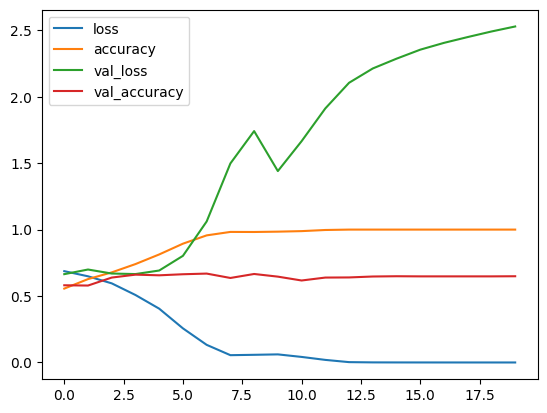

In [ ]:
history_1_df.plot() # Too much overfitting